In [1]:
#
# Import Libraries
#

import pickle
from dotmap import DotMap
import os
import numpy as np
import pandas as pd
import sys
from functools import reduce
import glob

import plotly.graph_objects as go
from plotly.subplots import make_subplots


utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

from MyCorrelations import Xsplit, MyCorrelations
from pvalues_correlations import getH0, plotNullAlt, get_pvalues, graph_size, get_corrThr, adjust_pvalues

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\PESA"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\PESA"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "f2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\PESA\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\PESA\myRData"

In [7]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
#m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t').set_index('Seqn')

In [8]:
ctype_omic = {
    'psk': ['qq', 'mm', 'qm'],
    #'pc': ['qq', 'mm'],
    'rpc': ['qq', 'mm'],
    'cca': ['qm'],
    'rcca': ['qm']
}

In [9]:
#
# Calculate correlations  
#

corr = MyCorrelations(xq, xm, mdata)
corr.PSK(methods=['pearson', 'spearman', 'kendall'])
corr.gLasso(test=False)
#corr.PartialCorrelation()
corr.rCCA(rPath)
corr.CCA()

omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.4s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  15s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  32s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.4s remaining:   48.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  70s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.8s remaining:   44.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  103s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.3s remaining:   26.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.0s remaining:   54.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  68s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.5s remaining:   45.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  102s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\covariance\_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -7.254e-04
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ss: d


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.8s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  22s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.3s remaining:   44.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  55s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.9s remaining:   40.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  88s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  343s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.4min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  775s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.3min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1179s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.5min remaining:  8.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1733s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.3min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  279s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.4min remaining:  8.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  646s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.0min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1403s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.7min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2021s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.8min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  256s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.8min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  575s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.8min remaining: 13.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1207s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.3min remaining: 12.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1884s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2006
Omic: qq | Subset: c | Alpha: 0.2115
Omic: qq | Subset: d | Alpha: 0.2384
Omic: mm | Subset: a | Alpha: 0.804
Omic: mm | Subset: c | Alpha: 0.9279
Omic: mm | Subset: d | Alpha: 0.7256
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading r

In [10]:
#
# Calculate Null Hypothesis Correlations
#

n = 2

corrSL = []
for xqsi in range(n):

    xqs = xq.copy()
    xms = xm.copy()

    _ = [np.random.shuffle(i) for i in xqs.to_numpy().T]
    _ = [np.random.shuffle(i) for i in xms.to_numpy().T]

    corrS = MyCorrelations(xqs, xms, mdata)
    corrS.PSK(methods=['pearson', 'spearman', 'kendall'])
    corrS.gLasso(test=False)
    #corrS.PartialCorrelation()
    corrS.rCCA(rPath)
    corrS.CCA()
    corrSL.append(corrS)

omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.3s remaining:   26.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  29s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  33s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  37s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  19s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.7s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  18s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  22s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 11.1min remaining: 16.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  686s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.6min remaining: 14.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1263s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.5min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1535s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.1min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1795s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 10.0min remaining: 15.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  637s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.3min remaining: 13.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1203s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.6min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1481s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.3min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1746s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 10.6min remaining: 15.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  671s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 10.5min remaining: 15.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1303s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.4min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1573s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1824s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2044
Omic: qq | Subset: c | Alpha: 0.2672
Omic: qq | Subset: d | Alpha: 0.2966
Omic: mm | Subset: a | Alpha: 0.2158
Omic: mm | Subset: c | Alpha: 0.3969
Omic: mm | Subset: d | Alpha: 0.369
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading r

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.4s remaining:   21.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  19s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  30s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.4s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  13s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  16s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.8s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  17s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.5min remaining: 14.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  597s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.3min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  978s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1222s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.2min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1473s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.1min remaining: 13.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  568s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.5min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1079s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.2min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1333s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.3min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1592s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.9min remaining: 13.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  571s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.6min remaining: 11.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1032s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1278s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  1523s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.1932
Omic: qq | Subset: c | Alpha: 0.3112
Omic: qq | Subset: d | Alpha: 0.2932
Omic: mm | Subset: a | Alpha: 0.2283
Omic: mm | Subset: c | Alpha: 0.3311
Omic: mm | Subset: d | Alpha: 0.4247
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

In [11]:
# Write correlations

f = open('corr.pkl', 'wb')
pickle.dump([corr, corrSL], f)
f.close()

In [12]:
# Read correlations

f = open('corr.pkl', 'rb')
corr, corrSL = pickle.load(f)
f.close()

In [13]:
#
# Get null hypothesis
#

h0c = DotMap()

h0c.psk = getH0(corrSL, 'psk', ['qq', 'mm', 'qm'], ['a', 'c', 'd', 'dc'])
h0c.rpc = getH0(corrSL, 'rpc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
#h0c.pc = getH0(corrSL, 'pc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
h0c.rcca = getH0(corrSL, 'rcca', ['qm'], ['a', 'c', 'd', 'dc'])
h0c.cca = getH0(corrSL, 'cca', ['qm'], ['a', 'c', 'd', 'dc'])

In [26]:
#
# Plot correlations Null vs Alternative
#

files = glob.glob(r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\PESA\plots\*')
for f in files:
    os.remove(f)

plotNullAlt(corr, h0c, ctype_omic, absolute=False, size=1*10**5)

In [15]:
#
# Calculate pvalues
#

pvals = get_pvalues(corr, h0c, ctype_omic, size=10**5)

In [16]:
adpvals = adjust_pvalues(pvals, ctype_omic)

In [17]:
# Write correlations

f = open('pvals.pkl', 'wb')
pickle.dump((pvals, adpvals), f)
f.close()

In [18]:
# Read correlations

f = open('pvals.pkl', 'rb')
pvals, adpvals = pickle.load(f)
f.close()

In [19]:
#
# Get correlation threshold
#

pvalueThr = 0.01

In [20]:
#
# Graph size
# Applying adjusted pvalues

edges, nodes = graph_size(ctype_omic, adpvals, pvalueThr=pvalueThr)

In [21]:
edges

qq            mm        qm           
      psk   rpc     psk   rpc psk cca   rcca
a   13965  2902  420393  2686   0   0  44704
c    6864  3043  285458     0   0   0  21151
d    7063  2233  269943  3138   0   0  11714
dc      0  3098       0  2904   0   0  14686

In [22]:
nodes

qq         mm       qm          
    psk  rpc   psk  rpc psk cca  rcca
a   470  445  1826  468   0   0  1536
c   470  461  1826    0   0   0  1099
d   470  437  1826  753   0   0  1023
dc    0  462     0  735   0   0  1229

In [23]:
print('Graph Density | qq-rpc & mm-rpc & qm-rcca')
print()
print(f'Adjusted p-value: {pvalueThr}')
print()
print(f'qq: {round(100*2953/(xq.shape[1]*(xq.shape[1]-1)/2),2)}%')
print(f'mm: {round(100*2302/(xm.shape[1]*(xm.shape[1]-1)/2),2)}%')
print(f'qm: {round(100*40095/(xq.shape[1]*xm.shape[1]),2)}%')

Graph Density | qq-rpc & mm-rpc & qm-rcca

Adjusted p-value: 0.01

qq: 2.68%
mm: 0.14%
qm: 4.67%


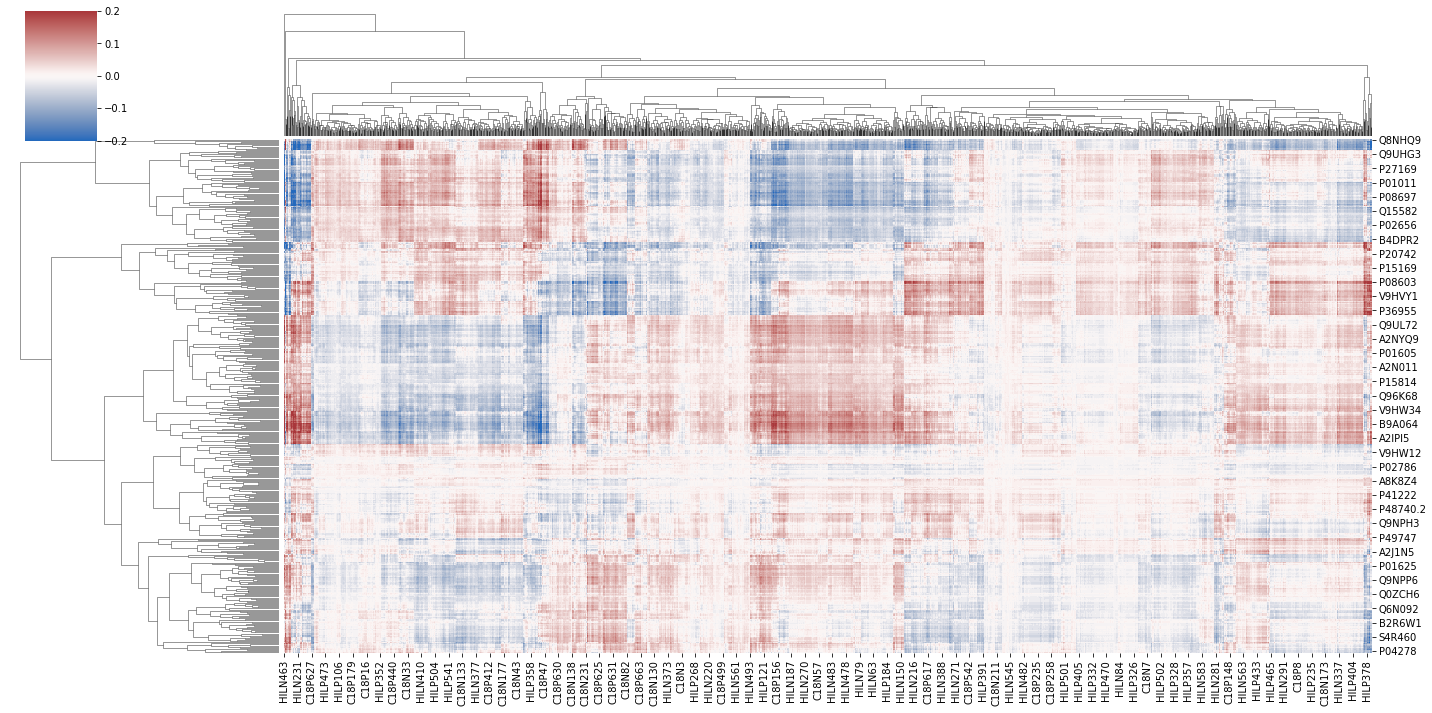

In [27]:
#
# Cluster Map
#

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc


df = corr.rcca.qm.dc
hmap = sns.clustermap(
    round(df,2), 
    cmap='vlag', 
    annot=False, 
    figsize=(20,10), 
    metric='euclidean', method='average', vmin=-0.2, vmax=0.2)